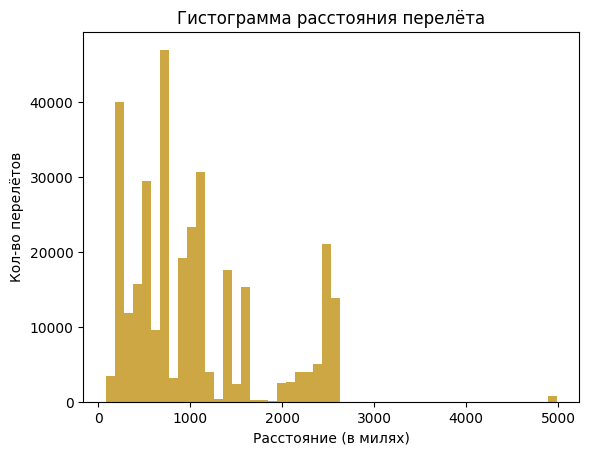

Среднее время задержки вылета в группе коротких перелётов: 13.30 минут
Среднее время задержки вылета в группе средних перелётов: 12.77 минут
Среднее время задержки вылета в группе длинных перелётов: 11.23 минут
3 наиболее часто встречающихся места назначения в группе длинных перелётов:
dest
Los Angeles International Airport      16026
San Francisco International Airport    13173
Denver International Airport            7169
Name: count, dtype: int64


In [24]:
# Задача: построить гистограмму расстояния перелёта; выделить на ней три группы перелётов (короткие, средние и длинные); определить, куда летят самолеты в группе длинных перелётов; найти среднее время задержки вылета в каждой из групп
# Для выполнения этого задания я использовал те же библиотеки pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('flights_NY.csv').dropna(axis=0)

# Построил гистограмму расстоянию перелёта (bins использовал, чтобы гистограмма нормально воспринималась)
plt.hist(flights['distance'], bins=50, color='#cda743')
plt.xlabel('Расстояние (в милях)')
plt.ylabel('Кол-во перелётов')
plt.title('Гистограмма расстояния перелёта')
plt.show()

# После того, как я посмотрел на гистограмму, мне показалось, что разумно разделить перелёты на группы так: короткие — до 500 миль, средние — от 500 до 1500, длинные — от 1500. Именно на эти диапазоны приходятся одни из самых крупных показателей по кол-ву перелётов
short_flights = flights[flights['distance'] < 500]
medium_flights = flights[(flights['distance'] >= 500) & (flights['distance'] < 1500)]
long_flights = flights[flights['distance'] >= 1500]

# Рассчитал среднее время задержки вылета в каждой группе
avg_delay_short = short_flights['dep_delay'].mean()
avg_delay_medium = medium_flights['dep_delay'].mean()
avg_delay_long = long_flights['dep_delay'].mean()

print(f'Среднее время задержки вылета в группе коротких перелётов: {avg_delay_short:.2f} минут')
print(f'Среднее время задержки вылета в группе средних перелётов: {avg_delay_medium:.2f} минут')
print(f'Среднее время задержки вылета в группе длинных перелётов: {avg_delay_long:.2f} минут')

# Определил 3 наиболее часто встречающихся места назначения в группе длинных перелётов (для красоты после расчётов заменил сокращённые названия аэропортов на полные)
long_flight_destinations = long_flights['dest'].value_counts().head(3)
airport_names = {'LAX': 'Los Angeles International Airport', 
                 'SFO': 'San Francisco International Airport', 
                 'DEN': 'Denver International Airport'}
long_flight_destinations.index = long_flight_destinations.index.map(airport_names)
print("3 наиболее часто встречающихся места назначения в группе длинных перелётов:")
print(long_flight_destinations)